# Análise de atendimentos hospitalares do SUS: valor total por Unidade Federativa

Neste notebook será feita a análise de custo total de atendimentos hospitalares, separados por Estado e medidos mensalmente.

Primeiro passo a ser realizado é importar as bibliotecas Pandas e MatplotLib

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

A segunda etapa é realizar a leitura dos dados. Para este caso, foi usado o dataset "A004241189_28_143_208.csv", disponível no <a href="http://tabnet.datasus.gov.br/cgi/deftohtm.exe?sih/cnv/qiuf.def">Datasus</a>

In [2]:
dados = pd.read_csv("A004241189_28_143_208.csv", encoding="ISO-8859-1", skiprows=3, sep=";", skipfooter=12, thousands=".", decimal=",", engine="python")
dados.tail()
print(dados)

      Unidade da Federação  1992/Mar  1992/Abr  1993/Mai  1993/Dez  1994/Jan  \
0              11 Rondônia         -         -         -         -         -   
1                  12 Acre         -         -         -         -         -   
2              13 Amazonas         -         -         -         -         -   
3               14 Roraima         -         -         -         -         -   
4                  15 Pará         -         -         -         -         -   
5                 16 Amapá         -         -         -         -         -   
6             17 Tocantins         -         -         -         -         -   
7              21 Maranhão         -         -         -         -         -   
8                 22 Piauí         -         -         -         -         -   
9                 23 Ceará         -         -         -         -         -   
10  24 Rio Grande do Norte         -         -         -         -         -   
11              25 Paraíba         -    

Como é possível verificar acima, os números estão sendo apresentados em notação científica. Para melhorar a legibilidade dos mesmos, vamos formatar globalmente o Pandas para formatar números de ponto flutuante com precisão de duas casas decimais.

In [3]:
pd.options.display.float_format = "{:.2f}".format

E agora nos certificamos que a formação está correta!

In [4]:
dados.mean().head()

2007/Ago     304952.77
2007/Set     788145.26
2007/Out    2440162.96
2007/Nov    5517354.05
2007/Dez   12337159.42
dtype: float64

A partir daqui vamos começar a plotar alguns gráficos. Este primeiro plotará os dados referentes a Agosto de 2008, somente informando os eixos X e Y.

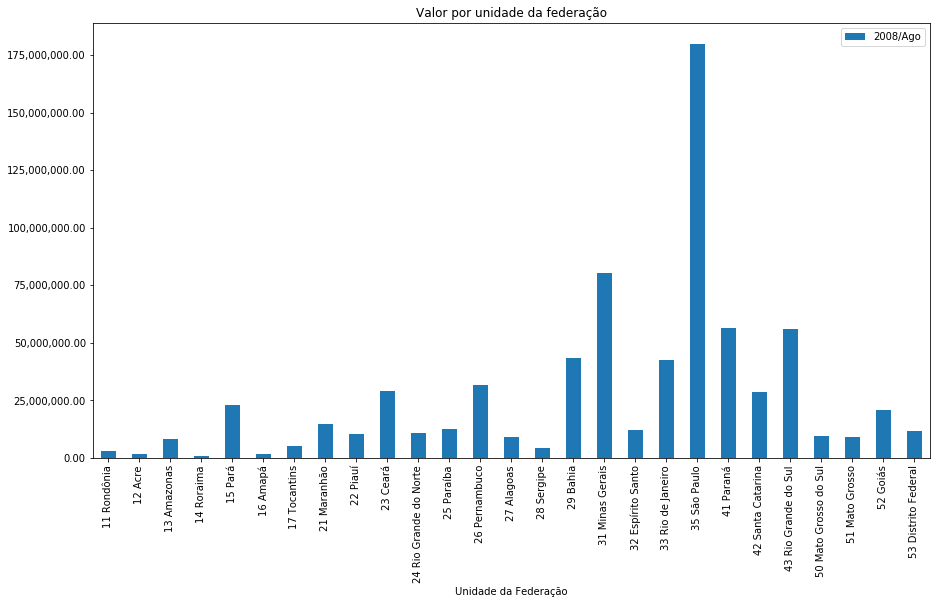

In [5]:
ax = dados.plot(x="Unidade da Federação", y="2008/Ago", kind="bar", figsize=(15,8))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.title("Valor por unidade da federação")
plt.show()

É possível melhorar a exibição deste gráfico, começando por ordenar os valores e apresenta-los na horizontal, exibindo valores por milhão de reais.

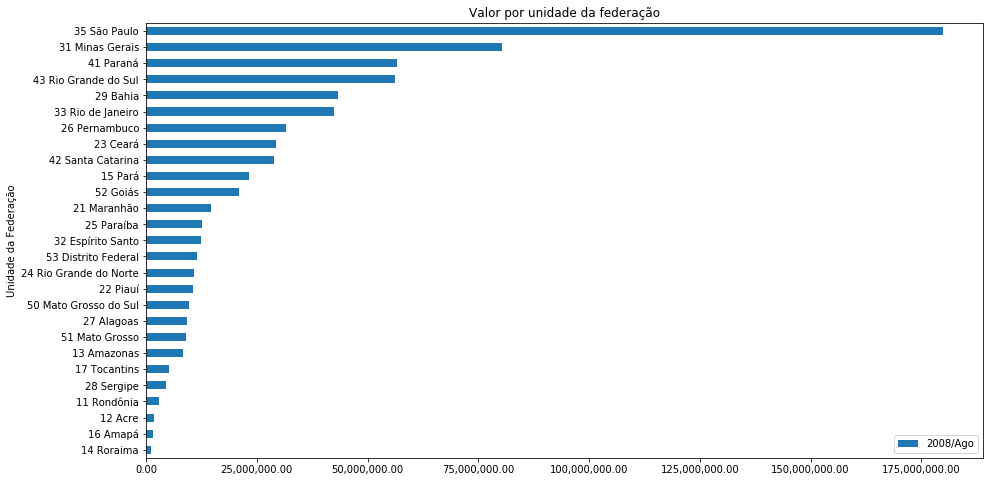

In [6]:
dados = dados.sort_values(by="2008/Ago", ascending=False)
ax = dados.plot(x="Unidade da Federação", y="2008/Ago", kind="barh", figsize=(15,8))
ax.invert_yaxis()
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.title("Valor por unidade da federação")
plt.show()

## Desafio 1

Para cumprir o primeiro desafio, segue o mesmo gráfico, porém com um título mais descritivo e o eixo de valores divido por um milhão, para facilitar a legibilidade.

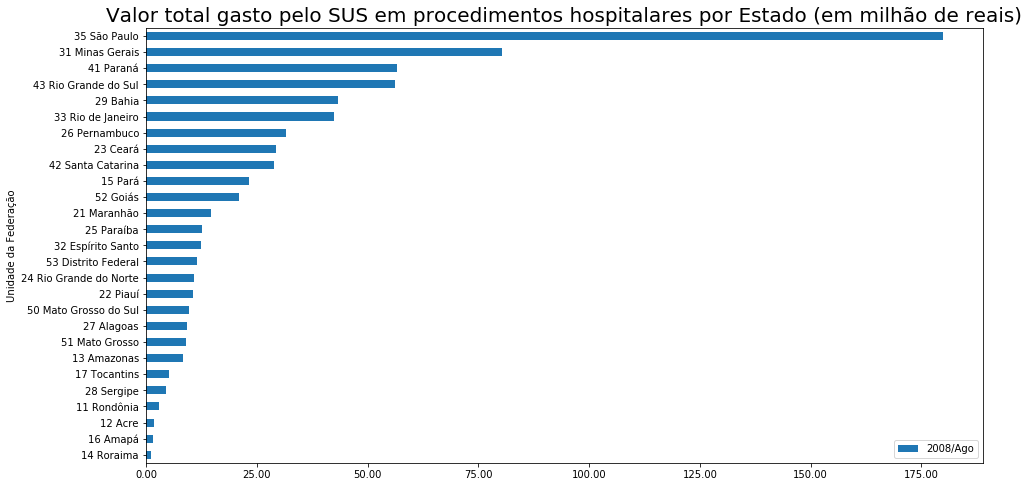

In [7]:
dados["2008/Ago"] /= 1000000
dados = dados.sort_values(by="2008/Ago", ascending=False)
ax = dados.plot(x="Unidade da Federação", y="2008/Ago", kind="barh", figsize=(15,8))
ax.invert_yaxis()
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.title(label = "Valor total gasto pelo SUS em procedimentos hospitalares por Estado (em milhão de reais)", fontsize=20)
plt.show()

## Desafio 2

Para cumprir o segundo desafio, precisaremos saber qual o mês mais recente disponível no dataset. Como os meses estão distribuídos em colunas, podemos realizar uma consulta no dataset para retornar, por exemplo, as últimas três colunas disponíveis.

In [8]:
dados[dados.columns[-3:]].head()
#dados.iloc[:, list(range(1)) + [-2]]

,2020/Jul,2020/Ago,Total
19,282709570.31,140414944.95,38929353900.57
16,120467187.34,57473699.06,19160106499.88
20,80320852.69,41542401.16,13786964617.27
22,78929703.81,28349257.38,11958647088.33
15,58898100.40,26023558.53,9193802684.16


Dado o resultado acima, verificamos que o mês mais recente disponível para análise é Agosto de 2020. Então vamos replicar o gráfico feito anteriormente, atualizando o mês e ano.
Existe uma linha na coluna referente ao mês de agosto que contém um hífen no lugar de um valor numérico. Para evitar erros durante a execução do código, vamos substituir esta ocorrência por um zero e, em seguinda, plotar o gráfico.

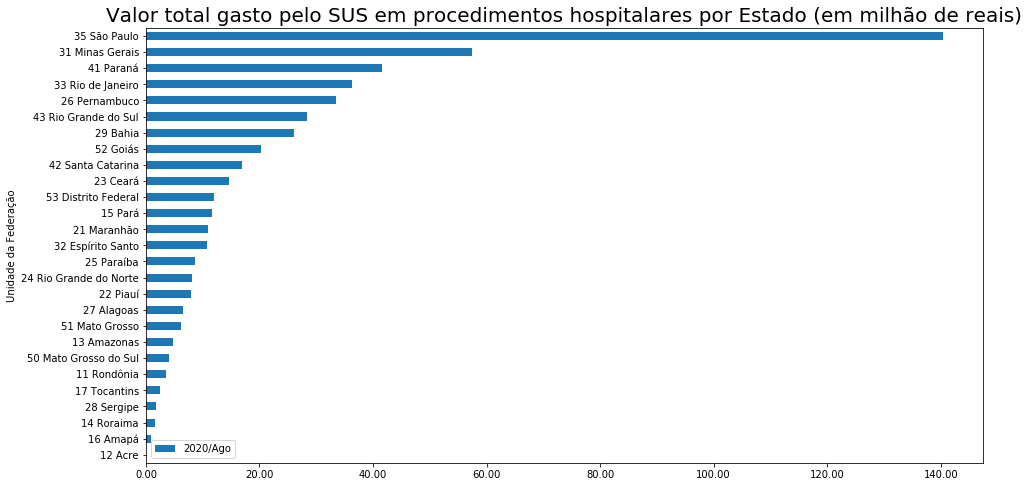

In [9]:
dados["2020/Ago"] = dados["2020/Ago"].str.replace(r'-', '0').astype(float)
dados["2020/Ago"] /= 1000000
dados = dados.sort_values(by="2020/Ago", ascending=False)
ax = dados.plot(x="Unidade da Federação", y="2020/Ago", kind="barh", figsize=(15,8))
ax.invert_yaxis()
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.title(label = "Valor total gasto pelo SUS em procedimentos hospitalares por Estado (em milhão de reais)", fontsize=20)
plt.show()

## A partir daqui começa a aula 2...

Neste ponto, vamos pegar os dados referentes aos meses de agosto e setembro de 2008, apenas para fins de verificação.

In [10]:
dados[["2008/Ago", "2008/Set"]].head()

,2008/Ago,2008/Set
19,179.90,180082203.71
16,80.37,82400146.79
20,56.70,58091985.79
18,42.49,43066461.47
12,31.71,30703879.20


A próxima etapa é pesquisar quais são as colunas com valores disponíveis para consulta. Uma das formas é calcular a média do dataset.

In [11]:
dados.mean()

2007/Ago       304952.77
2007/Set       788145.26
2007/Out      2440162.96
2007/Nov      5517354.05
2007/Dez     12337159.42
2008/Jan     75697225.19
2008/Fev     23816397.50
2008/Mar     25876082.14
2008/Abr     26210419.17
2008/Mai     26215326.43
2008/Jun     26215813.95
2008/Jul     27487256.94
2008/Ago           26.64
2008/Set     27049886.85
2008/Out     28081122.60
2008/Nov     27341312.17
2008/Dez     26787449.88
2009/Jan     30527229.24
2009/Fev     26456070.48
2009/Mar     32379863.58
2009/Abr     30958546.09
2009/Mai     31694131.59
2009/Jun     31484964.21
2009/Jul     32308861.22
2009/Ago     32395914.83
2009/Set     31740421.75
2009/Out     31961618.10
2009/Nov     31073667.92
2009/Dez     29404929.86
2010/Jan     33267948.42
                ...     
2018/Abr     47239172.40
2018/Mai     48417052.85
2018/Jun     46395470.88
2018/Jul     48086014.64
2018/Ago     49345477.29
2018/Set     45758563.30
2018/Out     49566746.37
2018/Nov     46123498.40
2018/Dez     43886096.76


Agora sabemos todas as colunas com valores usaveis. Então vamos colocar estas colunas em um atributo, usando o índice.

In [12]:
colunas_usaveis = dados.mean().index.tolist()
colunas_usaveis.insert(0, "Unidade da Federação")
colunas_usaveis

['Unidade da Federação',
 '2007/Ago',
 '2007/Set',
 '2007/Out',
 '2007/Nov',
 '2007/Dez',
 '2008/Jan',
 '2008/Fev',
 '2008/Mar',
 '2008/Abr',
 '2008/Mai',
 '2008/Jun',
 '2008/Jul',
 '2008/Ago',
 '2008/Set',
 '2008/Out',
 '2008/Nov',
 '2008/Dez',
 '2009/Jan',
 '2009/Fev',
 '2009/Mar',
 '2009/Abr',
 '2009/Mai',
 '2009/Jun',
 '2009/Jul',
 '2009/Ago',
 '2009/Set',
 '2009/Out',
 '2009/Nov',
 '2009/Dez',
 '2010/Jan',
 '2010/Fev',
 '2010/Mar',
 '2010/Abr',
 '2010/Mai',
 '2010/Jun',
 '2010/Jul',
 '2010/Ago',
 '2010/Set',
 '2010/Out',
 '2010/Nov',
 '2010/Dez',
 '2011/Jan',
 '2011/Fev',
 '2011/Mar',
 '2011/Abr',
 '2011/Mai',
 '2011/Jun',
 '2011/Jul',
 '2011/Ago',
 '2011/Set',
 '2011/Out',
 '2011/Nov',
 '2011/Dez',
 '2012/Jan',
 '2012/Fev',
 '2012/Mar',
 '2012/Abr',
 '2012/Mai',
 '2012/Jun',
 '2012/Jul',
 '2012/Ago',
 '2012/Set',
 '2012/Out',
 '2012/Nov',
 '2012/Dez',
 '2013/Jan',
 '2013/Fev',
 '2013/Mar',
 '2013/Abr',
 '2013/Mai',
 '2013/Jun',
 '2013/Jul',
 '2013/Ago',
 '2013/Set',
 '2013/Out',


E agora vamos requisitar ao dataframe somente as colunas que sabemos ter valores disponíveis para consulta.

In [13]:
usaveis = dados[colunas_usaveis]
usaveis.head()

,Unidade da Federação,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,...,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
19,35 São Paulo,1665349.90,4434168.64,14577395.84,35032259.98,76668547.41,1023564534.21,172834914.73,170481849.56,170278285.95,...,272697695.04,301991167.67,271356784.04,276606288.92,251696362.66,302857660.98,299060851.62,282709570.31,140.41,38929353900.57
16,31 Minas Gerais,971394.37,2861781.50,10018011.35,21730281.63,43429517.54,205912743.65,70301089.50,79119005.51,79046322.41,...,152398599.06,158097903.98,141323175.61,147078556.29,126330649.86,136867275.75,135977571.87,120467187.34,57.47,19160106499.88
20,41 Paraná,554800.22,1431708.01,4630402.44,11120030.79,28790722.87,58081334.45,48855046.46,55611791.07,56115135.82,...,113545318.91,122268754.10,116061602.52,114476997.52,96727112.19,106103737.62,92901461.36,80320852.69,41.54,13786964617.27
18,33 Rio de Janeiro,469469.34,921646.57,2994664.57,7250528.08,13627123.27,250564959.99,44122593.19,42892665.52,45295962.86,...,74895861.63,79705663.75,72412810.42,73594497.93,68160773.35,86281033.16,77604925.21,71540227.33,36.26,9696362872.68
12,26 Pernambuco,400640.85,1088340.42,2973553.48,6699828.82,16919031.39,51219113.60,26222079.10,30716361.81,30589332.79,...,64856891.24,69630712.14,62552189.96,59628674.07,53843729.23,65424719.40,68145110.59,62325444.34,33.54,8046954289.39


Neste ponto, iremos configurar o dataset para usar os Estados como índice.

In [14]:
usaveis = usaveis.set_index("Unidade da Federação")
usaveis.head()

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,...,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
35 São Paulo,1665349.90,4434168.64,14577395.84,35032259.98,76668547.41,1023564534.21,172834914.73,170481849.56,170278285.95,172402180.59,...,272697695.04,301991167.67,271356784.04,276606288.92,251696362.66,302857660.98,299060851.62,282709570.31,140.41,38929353900.57
31 Minas Gerais,971394.37,2861781.50,10018011.35,21730281.63,43429517.54,205912743.65,70301089.50,79119005.51,79046322.41,79268070.12,...,152398599.06,158097903.98,141323175.61,147078556.29,126330649.86,136867275.75,135977571.87,120467187.34,57.47,19160106499.88
41 Paraná,554800.22,1431708.01,4630402.44,11120030.79,28790722.87,58081334.45,48855046.46,55611791.07,56115135.82,55574831.93,...,113545318.91,122268754.10,116061602.52,114476997.52,96727112.19,106103737.62,92901461.36,80320852.69,41.54,13786964617.27
33 Rio de Janeiro,469469.34,921646.57,2994664.57,7250528.08,13627123.27,250564959.99,44122593.19,42892665.52,45295962.86,43951349.46,...,74895861.63,79705663.75,72412810.42,73594497.93,68160773.35,86281033.16,77604925.21,71540227.33,36.26,9696362872.68
26 Pernambuco,400640.85,1088340.42,2973553.48,6699828.82,16919031.39,51219113.60,26222079.10,30716361.81,30589332.79,31409553.23,...,64856891.24,69630712.14,62552189.96,59628674.07,53843729.23,65424719.40,68145110.59,62325444.34,33.54,8046954289.39


Com isso, agora podemos fazer consultas baseados no índice completo. Por exemplo, consultar dados de Agosto de 2019!

In [15]:
usaveis["2019/Ago"].head()

Unidade da Federação
35 São Paulo        302367276.77
31 Minas Gerais     161707825.05
41 Paraná           127174095.05
33 Rio de Janeiro    83311603.59
26 Pernambuco        71735626.96
Name: 2019/Ago, dtype: float64

Ou mesmo consultar dados baseados no Estado de Santa Catarina, por exemplo.

In [16]:
usaveis.loc["42 Santa Catarina"].head()

2007/Ago     693955.05
2007/Set    1092964.12
2007/Out    3562300.82
2007/Nov    7578502.38
2007/Dez   14772555.10
Name: 42 Santa Catarina, dtype: float64

Com o trabalho realizado até agora, já podemos gerar alguns gráficos. Vamos tentar gerar um bem simples.

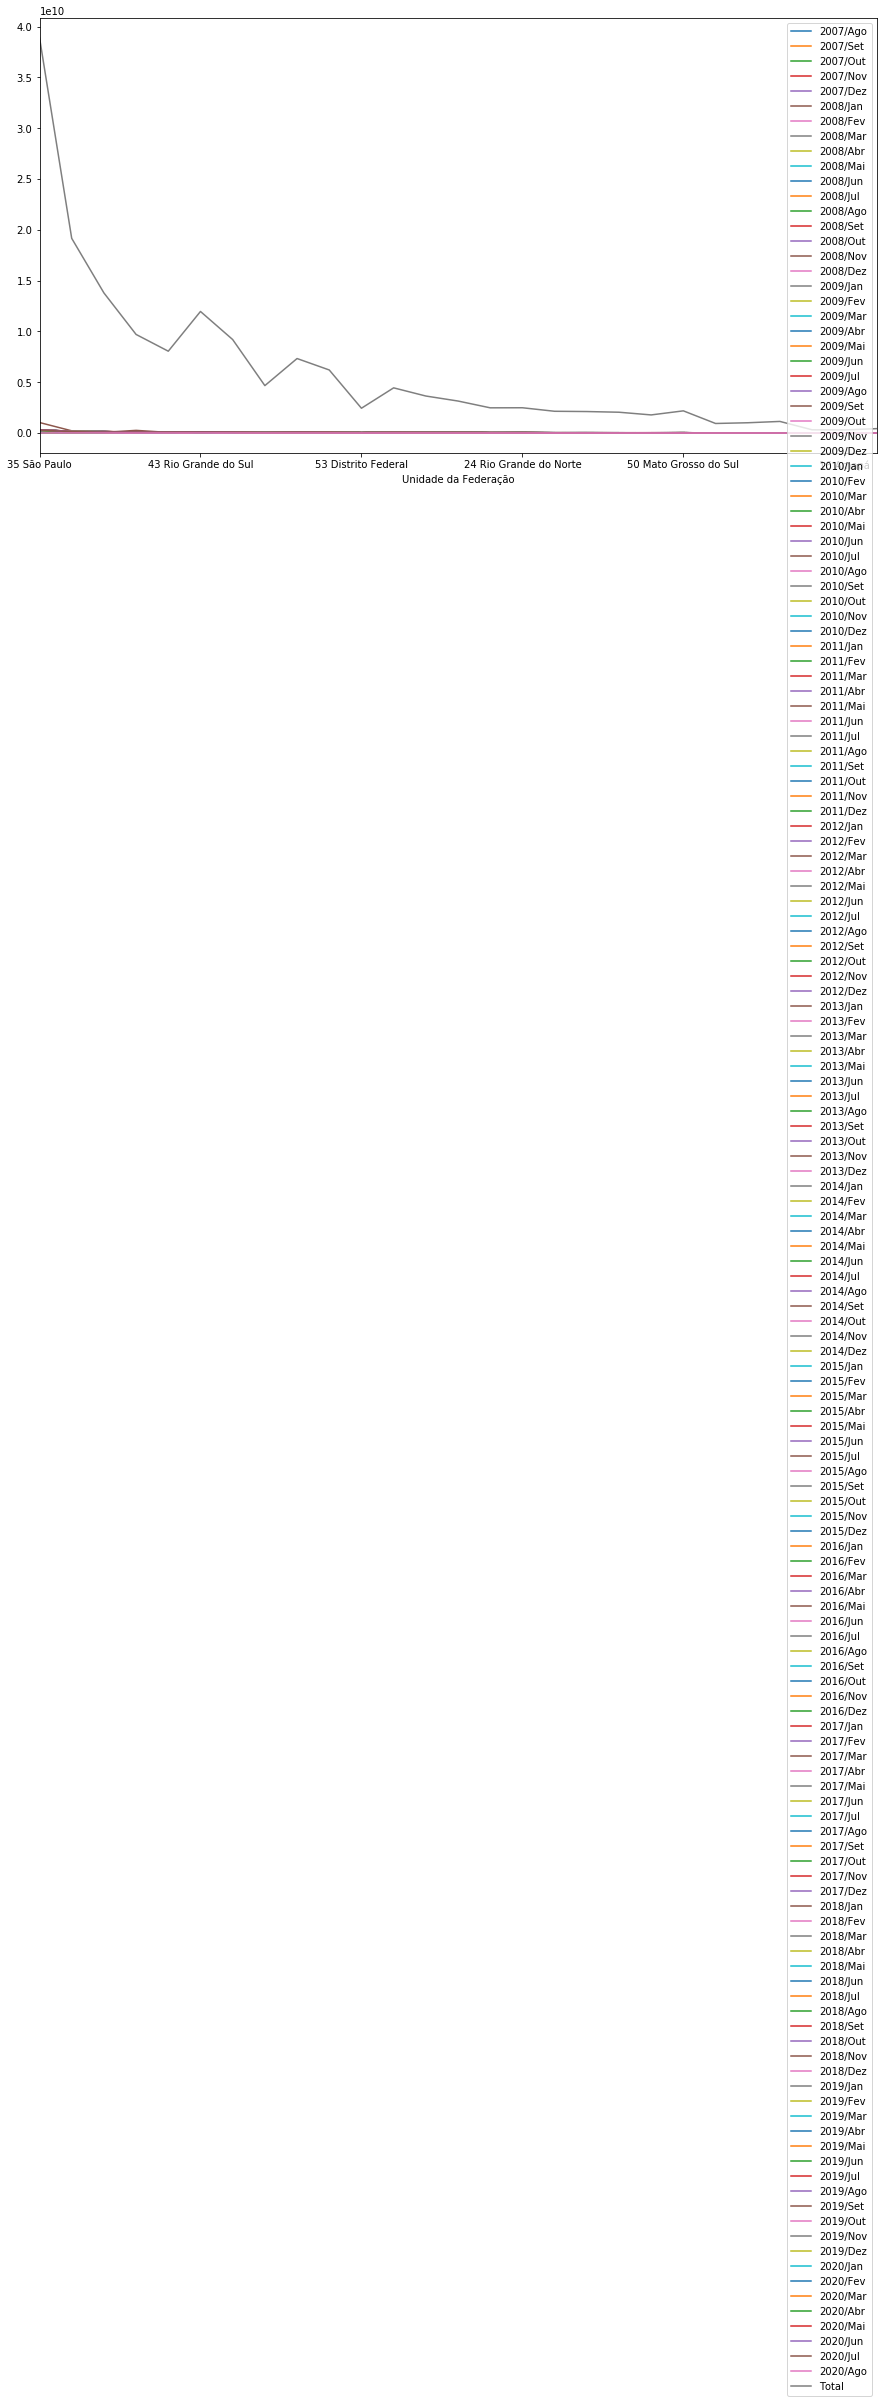

In [17]:
usaveis.plot(figsize=(15,8))

Perceba que o gráfico não ficou visualmente interessante! =/ Isso acontece porque ele está interpretando os Estados como linhas e os meses a anos como colunas. Vamos ver novamente a disposição dos dados no dataset.

In [18]:
usaveis.head()

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,...,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
35 São Paulo,1665349.90,4434168.64,14577395.84,35032259.98,76668547.41,1023564534.21,172834914.73,170481849.56,170278285.95,172402180.59,...,272697695.04,301991167.67,271356784.04,276606288.92,251696362.66,302857660.98,299060851.62,282709570.31,140.41,38929353900.57
31 Minas Gerais,971394.37,2861781.50,10018011.35,21730281.63,43429517.54,205912743.65,70301089.50,79119005.51,79046322.41,79268070.12,...,152398599.06,158097903.98,141323175.61,147078556.29,126330649.86,136867275.75,135977571.87,120467187.34,57.47,19160106499.88
41 Paraná,554800.22,1431708.01,4630402.44,11120030.79,28790722.87,58081334.45,48855046.46,55611791.07,56115135.82,55574831.93,...,113545318.91,122268754.10,116061602.52,114476997.52,96727112.19,106103737.62,92901461.36,80320852.69,41.54,13786964617.27
33 Rio de Janeiro,469469.34,921646.57,2994664.57,7250528.08,13627123.27,250564959.99,44122593.19,42892665.52,45295962.86,43951349.46,...,74895861.63,79705663.75,72412810.42,73594497.93,68160773.35,86281033.16,77604925.21,71540227.33,36.26,9696362872.68
26 Pernambuco,400640.85,1088340.42,2973553.48,6699828.82,16919031.39,51219113.60,26222079.10,30716361.81,30589332.79,31409553.23,...,64856891.24,69630712.14,62552189.96,59628674.07,53843729.23,65424719.40,68145110.59,62325444.34,33.54,8046954289.39


Note que os Estados estão nas linhas e os meses e anos nas colunas. O ideal seria transpor estes dados, ou seja, os Estados passarem a ser colunas e os meses e anos passarem a serem linhas. E isso é possível, invocando o "T" no dataset!

In [19]:
usaveis.T.head()

Unidade da Federação,35 São Paulo,31 Minas Gerais,41 Paraná,33 Rio de Janeiro,26 Pernambuco,43 Rio Grande do Sul,29 Bahia,52 Goiás,42 Santa Catarina,23 Ceará,...,27 Alagoas,51 Mato Grosso,13 Amazonas,50 Mato Grosso do Sul,11 Rondônia,17 Tocantins,28 Sergipe,14 Roraima,16 Amapá,12 Acre
2007/Ago,1665349.90,971394.37,554800.22,469469.34,400640.85,1049252.33,135146.36,179395.82,693955.05,357904.65,...,104243.75,63562.50,35752.72,199556.12,4209.37,4113.76,27453.63,4785.91,33672.74,10470.07
2007/Set,4434168.64,2861781.50,1431708.01,921646.57,1088340.42,3182913.14,448349.75,418053.58,1092964.12,572356.18,...,174024.90,232444.62,45570.64,573675.41,16397.03,76633.06,78565.19,11858.63,104822.98,14001.71
2007/Out,14577395.84,10018011.35,4630402.44,2994664.57,2973553.48,8571312.11,1382038.11,1198730.25,3562300.82,1865065.71,...,595544.54,927219.59,416012.30,1069816.66,133645.19,343702.61,122952.94,43852.67,118378.28,86200.85
2007/Nov,35032259.98,21730281.63,11120030.79,7250528.08,6699828.82,16592432.80,3348779.62,2712117.54,7578502.38,5131814.39,...,1125396.73,1740439.60,2020381.79,1995899.52,346912.84,1068685.94,775705.52,369328.51,226661.18,301323.68
2007/Dez,76668547.41,43429517.54,28790722.87,13627123.27,16919031.39,30134255.70,11948984.56,9293914.78,14772555.10,10798042.86,...,2564966.65,5394225.43,5949408.99,4277979.14,711758.31,3022200.87,2765495.63,470676.43,844019.90,769612.36


Agora está do jeito que queremos! :) Vamos tentar plotar um gráfico...

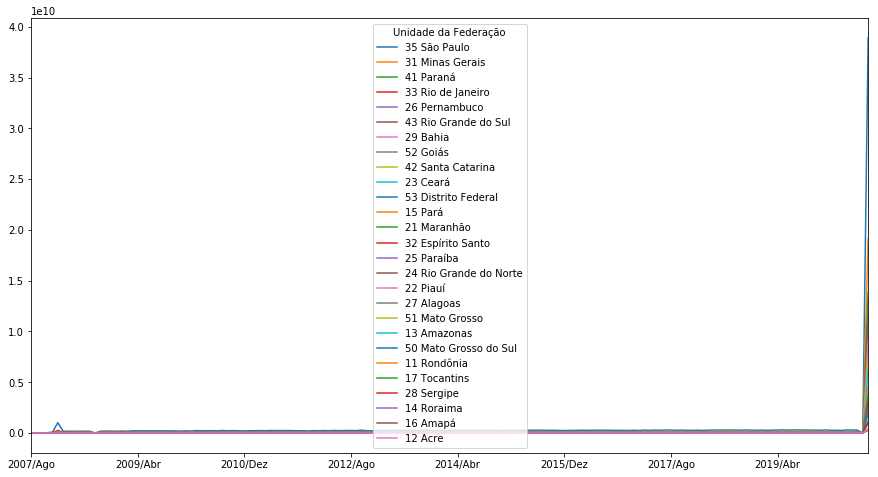

In [20]:
usaveis.T.plot(figsize=(15,8))

Melhorou um pouco. Mas ainda há algo estranho... Todo mundo está com valor próximo do zero. No final do gráfico a direita os valores estão absurdamente altos! O que está provocando isso? Uma dica é olhar para o final do nosso dataset, usando o comando "tail".

In [21]:
usaveis.T.tail()

Unidade da Federação,35 São Paulo,31 Minas Gerais,41 Paraná,33 Rio de Janeiro,26 Pernambuco,43 Rio Grande do Sul,29 Bahia,52 Goiás,42 Santa Catarina,23 Ceará,...,27 Alagoas,51 Mato Grosso,13 Amazonas,50 Mato Grosso do Sul,11 Rondônia,17 Tocantins,28 Sergipe,14 Roraima,16 Amapá,12 Acre
2020/Mai,302857660.98,136867275.75,106103737.62,86281033.16,65424719.40,86076113.42,61756775.71,31870107.62,56843604.33,54200339.48,...,15254204.31,13981483.29,19441150.53,16703851.10,8581195.13,6732370.56,8450209.57,2910776.44,2701014.87,2383895.48
2020/Jun,299060851.62,135977571.87,92901461.36,77604925.21,68145110.59,89019478.82,65159300.63,34437633.20,56503747.99,42146555.81,...,14278872.07,14585009.42,17509334.66,15838659.34,9193593.76,5018138.13,6705923.03,3216466.51,2699492.23,2199920.70
2020/Jul,282709570.31,120467187.34,80320852.69,71540227.33,62325444.34,78929703.81,58898100.40,33499284.38,51764534.76,30809221.22,...,13087850.40,13083151.70,13358514.02,12508717.35,7407388.24,4489665.87,3312766.32,2739498.41,2155083.37,1163813.08
2020/Ago,140.41,57.47,41.54,36.26,33.54,28.35,26.02,20.24,16.99,14.56,...,6.49,6.17,4.73,4.06,3.56,2.45,1.74,1.52,0.83,0.00
Total,38929353900.57,19160106499.88,13786964617.27,9696362872.68,8046954289.39,11958647088.33,9193802684.16,4657348958.66,7324100054.96,6197357245.98,...,2104405303.11,2036923784.59,1771654871.23,2172157981.36,929129659.72,999998621.85,1130337049.71,305010883.18,291637984.75,420668039.63


Repare a presença da última linha! Ela contém o total de gastos para cada mês e anos, prejudicando a legibilidade e análise do nosso dataset e gráficos. Precisamos de alguma forma eliminar esta linha de total! Podemos retirar com um "drop", indicando ao método que queremos que ele busque o valor na linha ("axis=1").

In [22]:
usaveis = usaveis.drop("Total", axis=1)
usaveis.T.tail()

Unidade da Federação,35 São Paulo,31 Minas Gerais,41 Paraná,33 Rio de Janeiro,26 Pernambuco,43 Rio Grande do Sul,29 Bahia,52 Goiás,42 Santa Catarina,23 Ceará,...,27 Alagoas,51 Mato Grosso,13 Amazonas,50 Mato Grosso do Sul,11 Rondônia,17 Tocantins,28 Sergipe,14 Roraima,16 Amapá,12 Acre
2020/Abr,251696362.66,126330649.86,96727112.19,68160773.35,53843729.23,76294596.96,59109689.20,27499307.93,51179993.45,43468816.62,...,14241361.44,11943713.53,16330913.81,15652772.51,7423678.64,6204453.42,8395906.57,2304961.42,1774558.12,2472063.08
2020/Mai,302857660.98,136867275.75,106103737.62,86281033.16,65424719.40,86076113.42,61756775.71,31870107.62,56843604.33,54200339.48,...,15254204.31,13981483.29,19441150.53,16703851.10,8581195.13,6732370.56,8450209.57,2910776.44,2701014.87,2383895.48
2020/Jun,299060851.62,135977571.87,92901461.36,77604925.21,68145110.59,89019478.82,65159300.63,34437633.20,56503747.99,42146555.81,...,14278872.07,14585009.42,17509334.66,15838659.34,9193593.76,5018138.13,6705923.03,3216466.51,2699492.23,2199920.70
2020/Jul,282709570.31,120467187.34,80320852.69,71540227.33,62325444.34,78929703.81,58898100.40,33499284.38,51764534.76,30809221.22,...,13087850.40,13083151.70,13358514.02,12508717.35,7407388.24,4489665.87,3312766.32,2739498.41,2155083.37,1163813.08
2020/Ago,140.41,57.47,41.54,36.26,33.54,28.35,26.02,20.24,16.99,14.56,...,6.49,6.17,4.73,4.06,3.56,2.45,1.74,1.52,0.83,0.00


Perceba que a linha de total não aparece mais! Agora sim podemos tentar plotar o gráfico novamente. :)

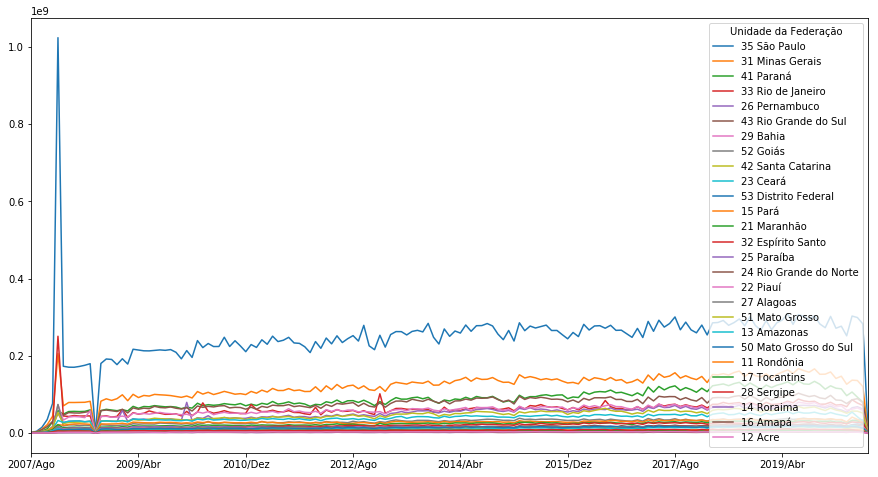

In [23]:
usaveis.T.plot(figsize=(15,8))

Agora sim está mais coerente!

## Desafio 1

O primeiro desafio proposto é colocar a legenda do gráfico em uma posição mais adequada. Vamos ao desafio!

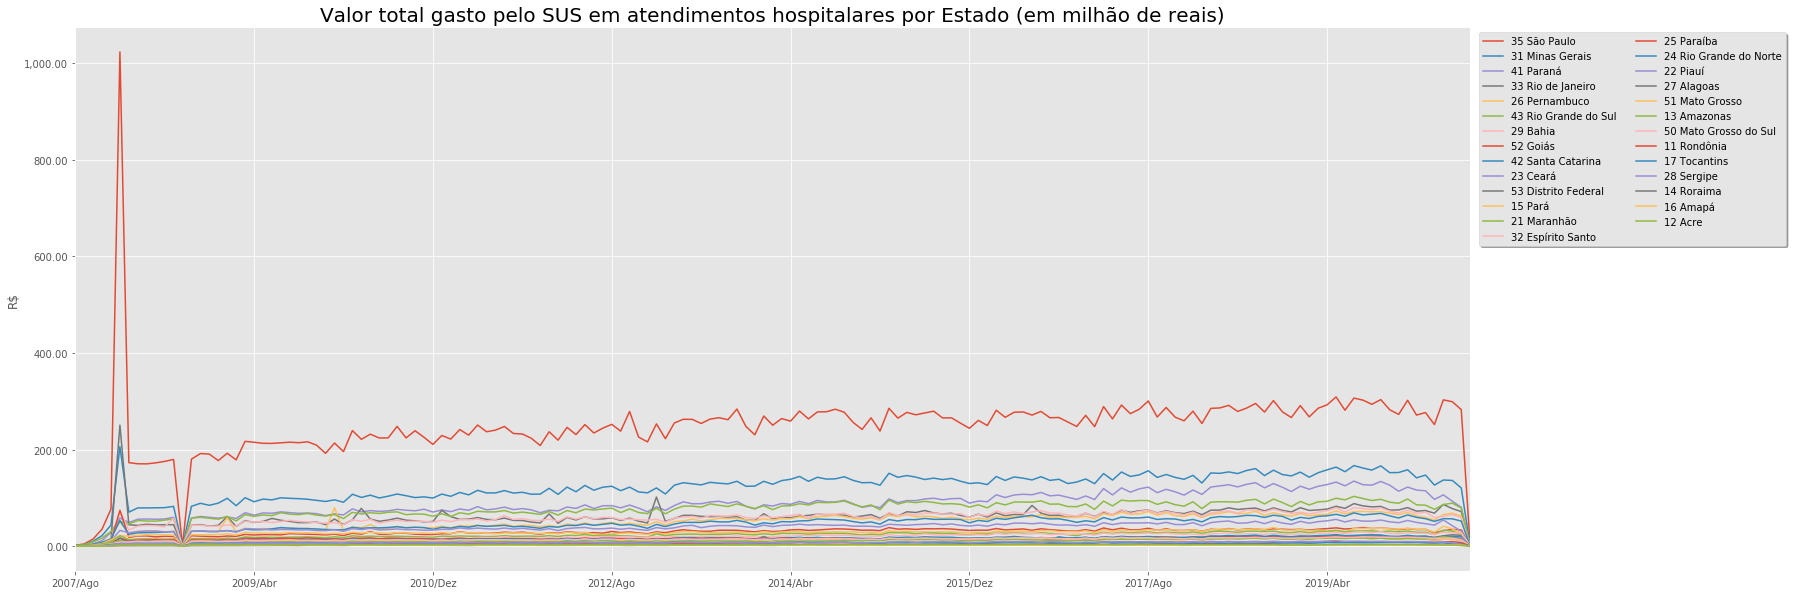

In [31]:
usaveis_plot = usaveis.div(1000000)
plt.style.use("ggplot")
ax = usaveis_plot.T.plot(figsize=(25,10))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.legend(loc="upper right", bbox_to_anchor=(1.23, 1.0), ncol=2, shadow=True, fancybox=True)
plt.ylabel("R$")
plt.title(label = "Valor total gasto pelo SUS em atendimentos hospitalares por Estado (em milhão de reais)", fontsize=20)
plt.show()

## Desafio 2

E se nós quiséssemos plotar o gráfico de apenas 5 Estados quaisquer? Vamos fazer isso agora. Aleatoriamente, vamos escolher os Estados de São Paulo, Minas Gerais, Rio de Janeiro, Santa Catarina e Sergipe.

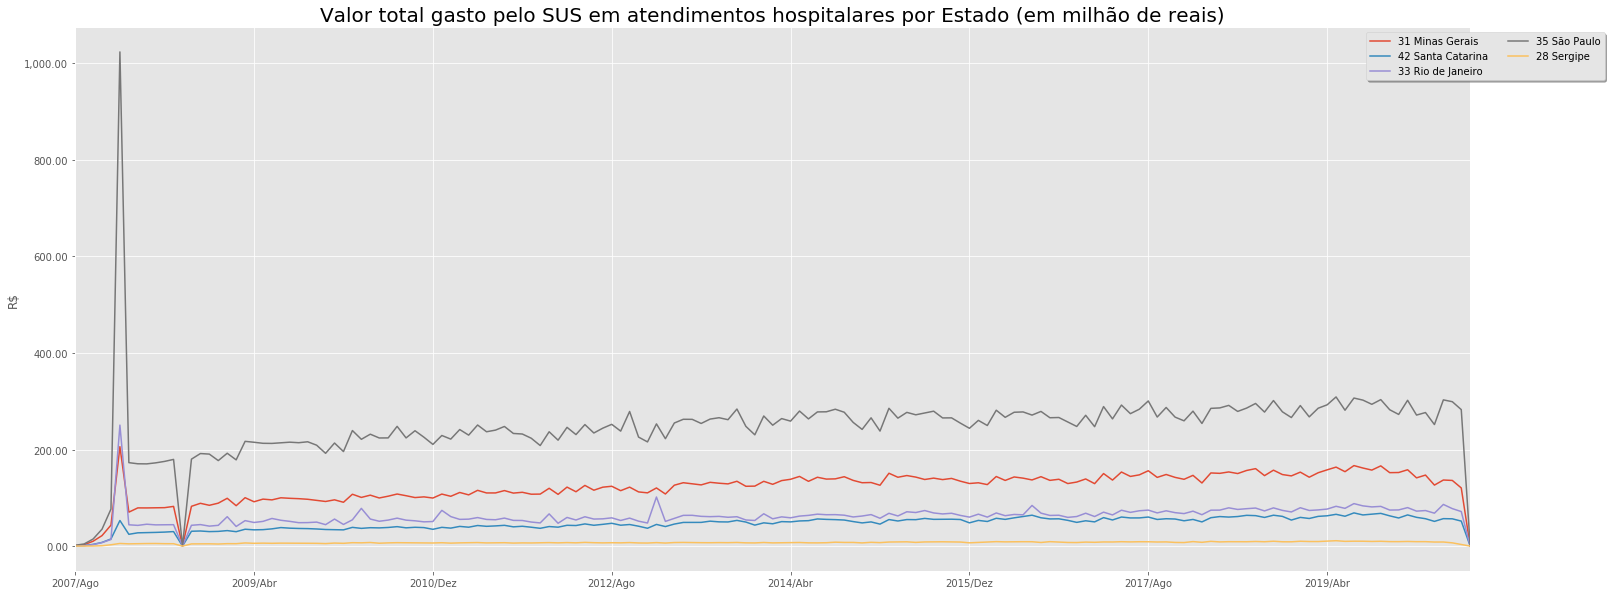

In [33]:
plt.style.use("ggplot")
ax = usaveis_plot.T.plot(figsize=(25,10), y=['31 Minas Gerais','42 Santa Catarina','33 Rio de Janeiro','35 São Paulo','28 Sergipe'])
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.legend(loc="upper right", bbox_to_anchor=(1.23, 1.0), ncol=2, shadow=True, fancybox=True)
plt.ylabel("R$")
plt.title(label = "Valor total gasto pelo SUS em atendimentos hospitalares por Estado (em milhão de reais)", fontsize=20)
plt.show()